# Global Flood Database Accuracy 
Written in Python 2

### WARNING: THis code is built to do one flood at a time. See GFD_Validation_Metrics_Testing_Number_of_Points_2.ipynb to see the same thing built in a loop to accept many floods

In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
#import pylabb
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/envs/vectorenv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/ckuhn/Documents/Coauthor/DFO_Accuracy/student_data/all_student_data.csv', low_memory=False)

## Preview the data

In [4]:
raw = df.copy()
raw.head(1)

,Unnamed: 0,B1,B2,B3,B4,B5,B7,MNDWI,NDVI,analyst,date,dfoID,id,lat,lon,random,strata,validation,score
0,0,675.522719,1128.643606,2015.265677,2436.991734,3702.040962,2753.348602,-0.365915,0.095263,HT,5/10/18,2143,0,-21.762688,123.87866,0.341315,0,0,0


In [5]:
raw.columns

Index(['Unnamed: 0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'MNDWI', 'NDVI',
       'analyst', 'date', 'dfoID', 'id', 'lat', 'lon', 'random', 'strata',
       'validation', 'score'],
      dtype='object')

# How does the number of sampling points impact the accuracy? 

## DEAR ~~GOD~~ ANNA SIMPSON HELP US 

Here we pick one flood and resample down the number of points from 500 to 10 to see if selecting fewer points gives us a different answer. I am literally manually changing the ID here and re-running this section for each flood. IDeally it would just loop through and do it automatically. 

**1. Pick one flood to resample**

In [36]:
df = raw.loc[raw['dfoID']== 2045]
df['random'].describe()

count    487.000000
mean       0.504903
std        0.291063
min        0.000354
25%        0.262569
50%        0.496626
75%        0.767999
max        0.998288
Name: random, dtype: float64

**2 Resample at different sizes from small to large**

In [37]:
teeny = df.sort_values('random',ascending = False).head(10)
print(len(teeny))
small = df.sort_values('random',ascending = False).head(50)
len(small)
medium = df.sort_values('random',ascending = False).head(100)
len(medium)
large = df.sort_values('random',ascending = False).head(200)
len(large)
xlarge = df.sort_values('random',ascending = False)
len(xlarge)

10


487

**3 For each resampled dataframe, calculate the error metrics**

In [38]:
df = teeny

# True positives = they were both labeled flood
#Validation (1) + Strata (4)
tp0 = len(df.loc[df['score']== 5])

# True negative = they were both labeled dry
#Validation (0) + Strata (0)
tn0 = len(df.loc[df['score']== 0])

#Validation (0) + Strata (4)
fp0 = len(df.loc[df['score']== 4])

#Validation (1) + Strata (0)
fn0 = len(df.loc[df['score']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

NumofPoints0 = 10
prec0  = tp0 / (tp0 + fp0) # Likelihood that pixel labeled flooded was really flooded
recall0   = tp0 / (tp0 + fn0)  # % of flooded pixels it ID'ed correctly
acc0 = (tn0 + tp0) / (tn0+tp0+fp0+fn0)

prod_om_error0 = tp0 / (tp0 + fn0)  #  modeled positives over all true positives
cons_com_error0 = tp0 / (tp0 + fp0) #  true modeled positives over all modeled positives

tp0 , tn0, fp0, fn0

(2, 3, 1, 0)

In [39]:
df = small 

#Validation (1) + Strata (4)
tp1 = len(df.loc[df['score']== 5])
#Validation (0) + Strata (0)
tn1 = len(df.loc[df['score']== 0])
#Validation (0) + Strata (4)
fp1 = len(df.loc[df['score']== 4])
#Validation (1) + Strata (0)
fn1 = len(df.loc[df['score']== 1])
prod_om_error1 = tp1 / (tp1 + fn1) 
cons_com_error1 = tp1 / (tp1 + fp1) 

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

NumofPoints1 = 50
prec1  = tp1 / (tp1 + fp1) # Likelihood that pixel labeled flooded was really flooded
recall1   = tp1 / (tp1 + fn1)  # % of flooded pixels it ID'ed correctly
acc1 = (tn1 + tp1) / (tn1+tp1+fp1+fn1)

In [40]:
df = medium


#Validation (1) + Strata (4)
tp2 = len(df.loc[df['score']== 5])
#Validation (0) + Strata (0)
tn2 = len(df.loc[df['score']== 0])
#Validation (0) + Strata (4)
fp2 = len(df.loc[df['score']== 4])
#Validation (1) + Strata (0)
fn2 = len(df.loc[df['score']== 1])
# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)
NumofPoints2 = 100
prec2  = tp2 / (tp2 + fp2) # Likelihood that pixel labeled flooded was really flooded
recall2   = tp2 / (tp2 + fn2)  # % of flooded pixels it ID'ed correctly
acc2 = (tn2 + tp2) / (tn2+tp2+fp2+fn2)
prod_om_error2 = tp2 / (tp2 + fn2) 
cons_com_error2 = tp2 / (tp2 + fp2) 

In [41]:
df = large

#Validation (1) + Strata (4)
tp3 = len(df.loc[df['score']== 5])
#Validation (0) + Strata (0)
tn3 = len(df.loc[df['score']== 0])
#Validation (0) + Strata (4)
fp3 = len(df.loc[df['score']== 4])
#Validation (1) + Strata (0)
fn3 = len(df.loc[df['score']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

NumofPoints3 = 250
prec3  = tp3 / (tp3 + fp3) # Likelihood that pixel labeled flooded was really flooded
recall3   = tp3 / (tp3 + fn3)  # % of flooded pixels it ID'ed correctly
acc3 = (tn3 + tp3) / (tn3+tp3+fp3+fn3)

prod_om_error3 = tp3 / (tp3 + fn3) 
cons_com_error3 = tp3 / (tp3 + fp3) 

In [42]:
df = xlarge

#Validation (1) + Strata (4)
tp4 = len(df.loc[df['score']== 5])
#Validation (0) + Strata (0)
tn4 = len(df.loc[df['score']== 0])
#Validation (0) + Strata (4)
fp4 = len(df.loc[df['score']== 4])
#Validation (1) + Strata (0)
fn4 = len(df.loc[df['score']== 1])

# 3 = STudents labeled it as water (1), it is permanent water (2)
# 2 = DFO labeled it as permanent water (2), students said it wasn't water (0)

NumofPoints4 = 500
prec4  = tp4 / (tp4 + fp4) # Likelihood that pixel labeled flooded was really flooded
recall4   = tp4 / (tp4 + fn4)  # % of flooded pixels it ID'ed correctly
acc4 = (tn4 + tp4) / (tn4+tp4+fp4+fn4)
prod_om_error4 = tp4 / (tp4 + fn4) 
cons_com_error4 = tp4 / (tp4 + fp4) 


**4 Now stick them all together into a new dataframe**

In [43]:
d = {'NumofPoints': [NumofPoints0, NumofPoints1, NumofPoints2,NumofPoints3, NumofPoints4], 
     'tp': [tp0, tp1,tp2,tp3, tp4], 
     'tn': [tn0, tn1,tn2,tn3, tn4], 
     'fp': [fp0, fp1,fp2,fp3, fp4], 
     'fn': [fn0, fn1,fn2,fn3, fn4], 
     'precision': [prec0, prec1,prec2,prec3, prec4], 
     'recall': [recall0, recall1,recall2,recall3, recall4], 
     'overall_accuracy': [acc0,acc1, acc2, acc3, acc4],
    'comission': [prod_om_error0, prod_om_error1, prod_om_error2, 
                  prod_om_error3, prod_om_error4],
     'omission': [cons_com_error0, cons_com_error1, cons_com_error2, 
                  cons_com_error3, cons_com_error4]}
df = pd.DataFrame(data=d)

df.to_csv('calculated_data.csv', encoding='utf-8')

## RERUN THIS CODE ABOVE LIKE AN IDIOT FOR EACH DIFFERENT FLOOD UNTIL ANNA SAVES YOU AND TEACHES YOU HOW TO PROPERLY WRITE A LOOP!

In [44]:
# Create an object for each flood by running the above lines of code, swapping out 
# the flood id each time, until you have created an new df for each of the flood ids

#df_2143 = df
df_2045 = df
#df_2180 = df

Text(0,0.5,'Overall Accuracy (&)')

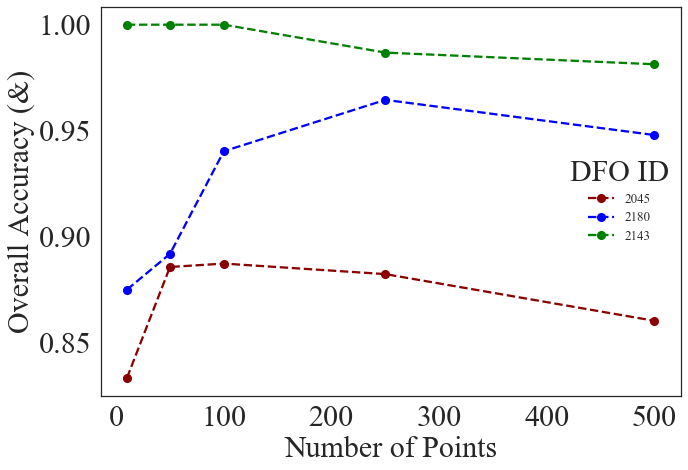

In [45]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman", size = 30)
    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30) 
    plt.rc({'axes.titlesize': 'large'})
set_style()  



x = 10, 50, 100, 250, 500
y1 = df_2045['overall_accuracy'].values
y2 = df_2180['overall_accuracy'].values
y3 = df_2143['overall_accuracy'].values
plt.xticks(np.arange(0, 600, step=100))

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

plt.legend(title="DFO ID")
plt.xlabel('Number of Points', fontsize=30)
plt.ylabel('Overall Accuracy (&)', fontsize=30)


#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_overallacc.png', dpi = 300)

Text(0,0.5,'Precision')

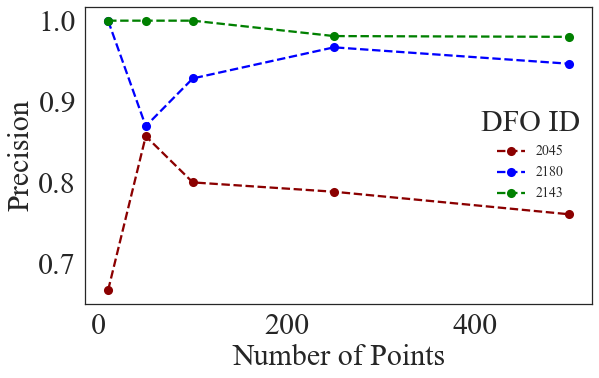

In [46]:
plt.figure(figsize=(20, 12))

plt.subplot(221) 

x = 10, 50, 100, 250, 500
y1 = df_2045['precision'].values
y2 = df_2180['precision'].values
y3 = df_2143['precision'].values

plt.plot(x, y1,color='darkred',marker='o', linestyle='--', label='2045')
plt.plot(x, y2,color='blue', marker='o', linestyle='--',label='2180')
plt.plot(x, y3, color='green', marker='o', linestyle='--',label='2143')

#plt.axvline(x=100, color= 'grey')
plt.legend(title="DFO ID", fontsize=14)
plt.xlabel('Number of Points',fontsize=30)
plt.ylabel('Precision',fontsize=30)
#%cd /Users/ckuhn/Documents/DFO_Accuracy/figures
#plt.savefig('point_test_precision.png', dpi = 300)
